# Logistic Regression of Pima Indians Diabetes

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
#imported the library and load the dataset
import pandas as pd
dataset = pd.read_csv('diabetes.csv')

In [2]:
#dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#inspection of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#description of the data, what are the maximum and minimum
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#no columns that have missing values
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#The columns in the dataset
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#The dataset have 768 rows and 9 columns
dataset.shape

(768, 9)

## Data Cleaning


In [8]:
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


### Data Visualization

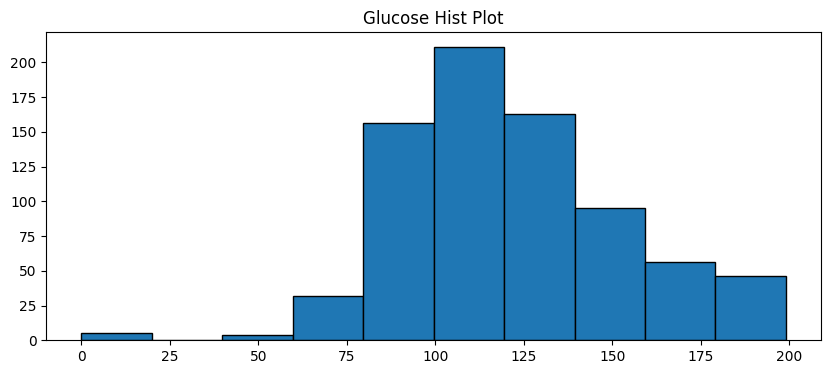

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
plt.hist("Glucose", data = dataset , edgecolor = "k")
plt.title("Glucose Hist Plot")
plt.show()

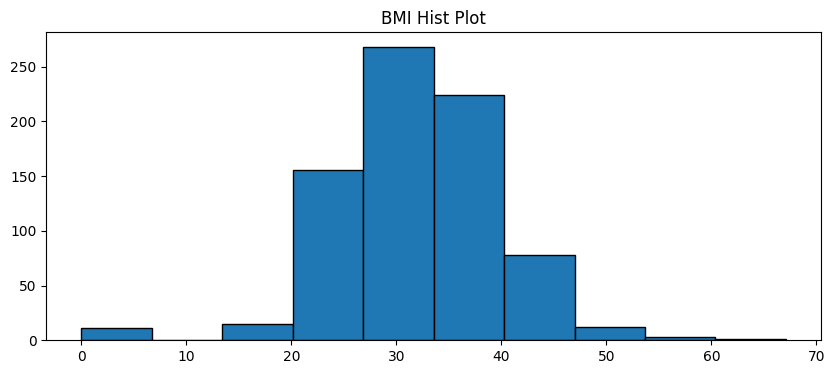

In [10]:
plt.figure(figsize = (10,4))
plt.hist("BMI", data = dataset , edgecolor = "k")
plt.title("BMI Hist Plot")
plt.show()

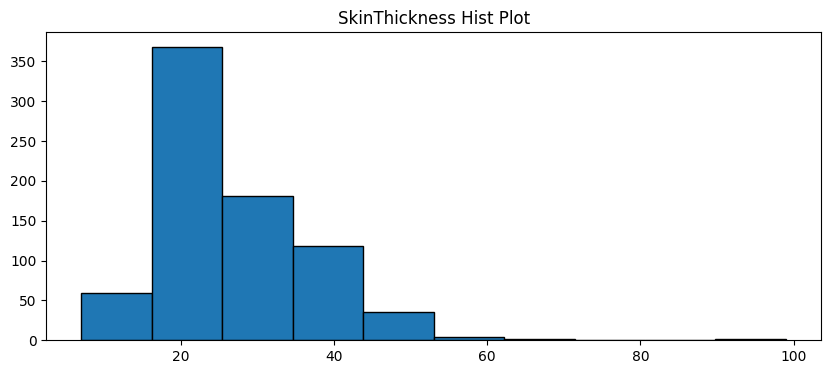

In [11]:
plt.figure(figsize = (10,4))
plt.hist("SkinThickness", data = dataset , edgecolor = "k")
plt.title("SkinThickness Hist Plot")
plt.show()

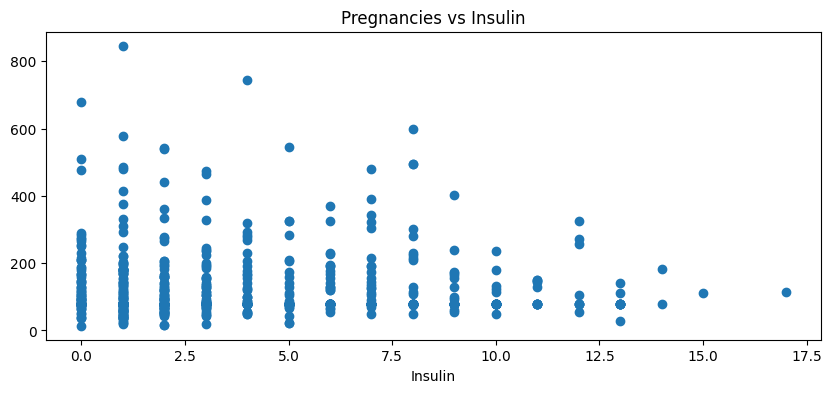

In [12]:
plt.figure(figsize = (10,4))
plt.scatter("Pregnancies", "Insulin" , data = dataset)
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.xlabel("Insulin")
plt.show()

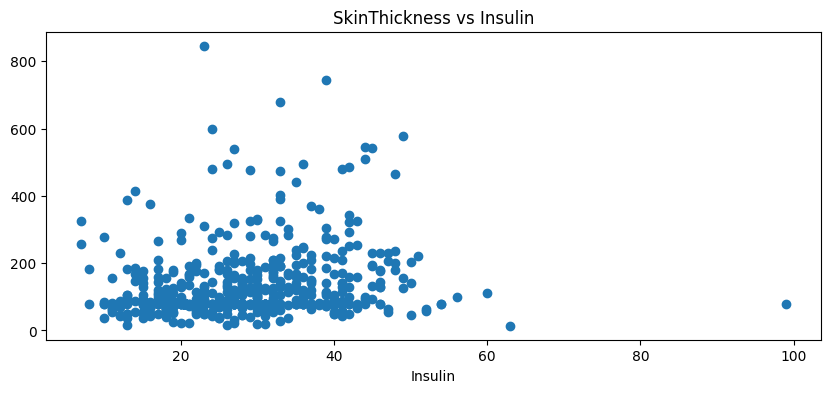

In [13]:
plt.figure(figsize = (10,4))
plt.scatter("SkinThickness", "Insulin" , data = dataset)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.xlabel("Insulin")
plt.show()

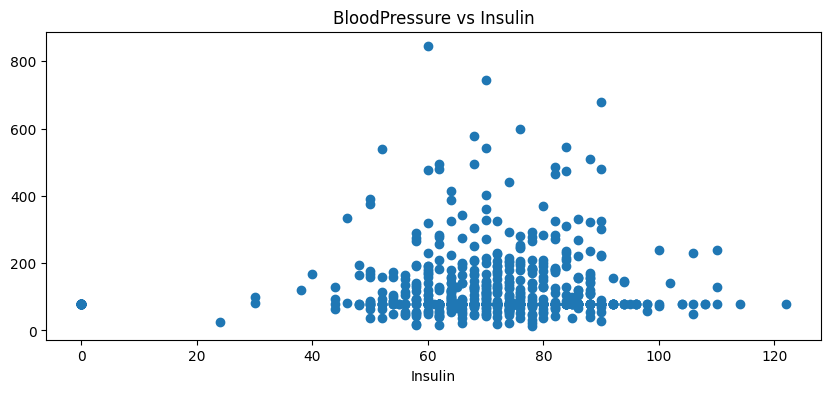

In [14]:
plt.figure(figsize = (10,4))
plt.scatter("BloodPressure", "Insulin" , data = dataset)
plt.title("BloodPressure vs Insulin")
plt.xlabel("BloodPressure")
plt.xlabel("Insulin")
plt.show()

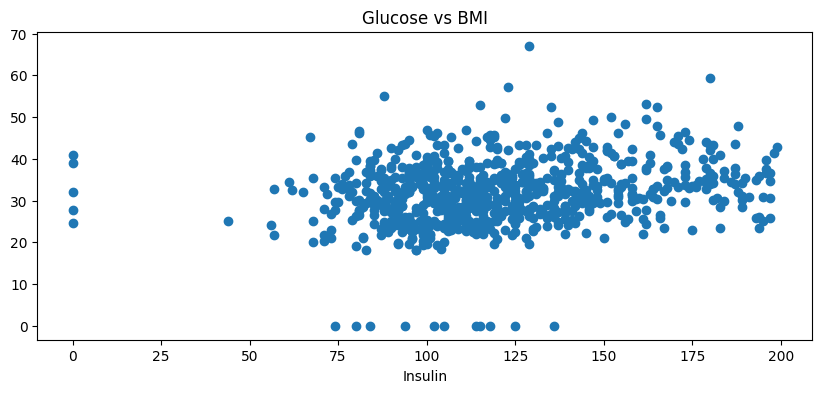

In [15]:
plt.figure(figsize = (10,4))
plt.scatter("Glucose", "BMI" , data = dataset)
plt.title("Glucose vs BMI")
plt.xlabel("BMI")
plt.xlabel("Insulin")
plt.show()

In [16]:
dataset.shape

(768, 9)

### Getting the inputs and output

In [17]:
X = dataset.iloc[:, :-1].values
X = dataset.drop(["Outcome"], axis = 1)
y = dataset.iloc[:,-1].values
y = dataset["Outcome"]

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Creating the Training Set and the Test Set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [21]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,79.799479,0.0,0.304,21
618,9,112,82,24.000000,79.799479,28.2,1.282,50
346,1,139,46,19.000000,83.000000,28.7,0.654,22
294,0,161,50,20.536458,79.799479,21.9,0.254,65
231,6,134,80,37.000000,370.000000,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


In [22]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33.000000,190.000000,34.0,0.430,43
324,2,112,75,32.000000,79.799479,35.7,0.148,21
624,2,108,64,20.536458,79.799479,30.8,0.158,21
690,8,107,80,20.536458,79.799479,24.6,0.856,34
473,7,136,90,20.536458,79.799479,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,20.536458,79.799479,30.4,0.302,49
534,1,77,56,30.000000,56.000000,33.3,1.251,24
344,8,95,72,20.536458,79.799479,36.8,0.485,57
296,2,146,70,38.000000,360.000000,28.0,0.337,29


In [23]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [24]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [38]:
X_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

## Part 2 - Building and training the model

### Building the model

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Training the model

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

### Inference

Making the predictons of the data points in the test set

In [41]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [43]:
model.predict(sc.transform(X_test))

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## Part 3: Evaluating the model 

### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[79, 20],
       [18, 37]])

In [45]:
cm =  confusion_matrix(y_test, y_pred)
cm

array([[79, 20],
       [18, 37]])

<Axes: >

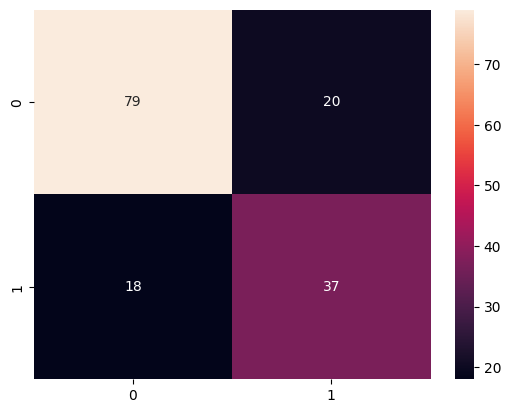

In [52]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [53]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        99\n           1       0.65      0.67      0.66        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n'

### Accuracy

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7532467532467533